# Example 3

This notebook generates events inside the MicroBooNE cryostat.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

import DarkNews as dn

## Generating events for a few experimental setups

We generate them MicroBooNE

In [3]:
kwargs = {  
        'neval': 1e4,
        'HNLtype': 'dirac',
        'nopelastic': True,
        'pandas': False,
        'loglevel': 'WARNING'
        }

# Generating 
gen_object = dn.GenLauncher(mzprime=1.25, m4=0.150, experiment='miniboone_fhc', **kwargs)
gen_object.run()
df1 = gen_object.df

gen_object = dn.GenLauncher(mzprime=1.25, m4=0.150, experiment='miniboone_fhc_dirt', **kwargs)
gen_object.run()
df2 = gen_object.df


gen_object = dn.GenLauncher(mzprime=1.25, m4=0.150, experiment='microboone', **kwargs)
gen_object.run()
df3 = gen_object.df

gen_object = dn.GenLauncher(mzprime=1.25, m4=0.150, experiment='microboone_dirt', **kwargs)
gen_object.run()
df4 = gen_object.df

gen_object = dn.GenLauncher(mzprime=1.25, m4=0.150, experiment='microboone_numi_fhc', **kwargs)
gen_object.run()
df5 = gen_object.df

Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.


In [4]:
df_mini = dn.MC.get_merged_MC_output(df1, df2)
df_micro = dn.MC.get_merged_MC_output(df3, df4)
# df_micro = df4
df_micro_numi =dn.MC.get_merged_MC_output(df5, df4)

Beware! Merging generation cases with different df.attrs['experiment']! Discarting the second (newest) case.
Beware! Merging generation cases with different df.attrs['experiment']! Discarting the second (newest) case.
Beware! Merging generation cases with different df.attrs['experiment']! Discarting the second (newest) case.


#### Looking at the geometry of the scattering positions: XY plane

In [5]:
df_micro_numi.keys()

MultiIndex([(      'P_projectile', '0'),
            (      'P_projectile', '1'),
            (      'P_projectile', '2'),
            (      'P_projectile', '3'),
            (          'P_target', '0'),
            (          'P_target', '1'),
            (          'P_target', '2'),
            (          'P_target', '3'),
            (          'P_recoil', '0'),
            (          'P_recoil', '1'),
            (          'P_recoil', '2'),
            (          'P_recoil', '3'),
            (  'P_decay_N_parent', '0'),
            (  'P_decay_N_parent', '1'),
            (  'P_decay_N_parent', '2'),
            (  'P_decay_N_parent', '3'),
            ( 'P_decay_ell_minus', '0'),
            ( 'P_decay_ell_minus', '1'),
            ( 'P_decay_ell_minus', '2'),
            ( 'P_decay_ell_minus', '3'),
            (  'P_decay_ell_plus', '0'),
            (  'P_decay_ell_plus', '1'),
            (  'P_decay_ell_plus', '2'),
            (  'P_decay_ell_plus', '3'),
            ('P_

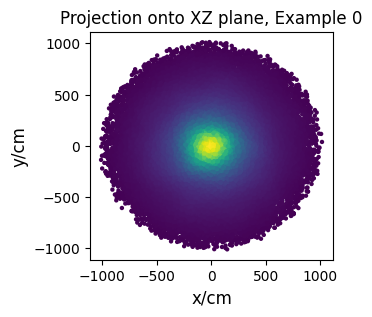

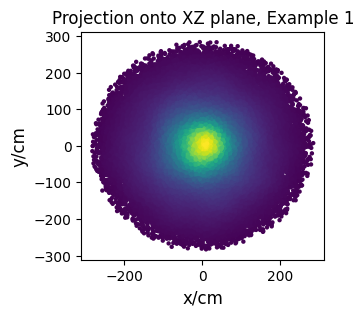

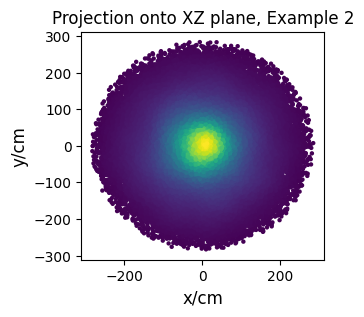

In [6]:
df_list = [df_mini, df_micro, df_micro_numi]

for i, df in enumerate(df_list):
    title = r"Projection onto XZ plane, Example " + str(i)
    xlabel = r'x/cm'
    ylabel = r'y/cm'
    
    axes_form  =[0.16,0.16,0.81,0.76]
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_axes(axes_form, rasterized=False)

    x = df['pos_scatt', '1']
    y = df['pos_scatt', '2']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy, weights=df['w_event_rate'])(xy)
    ax.scatter(x, y, c=z, s=10, edgecolor='None')

    ax.set_title(title,   fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

#### Looking at the geometry of the scattering positions: YZ plane

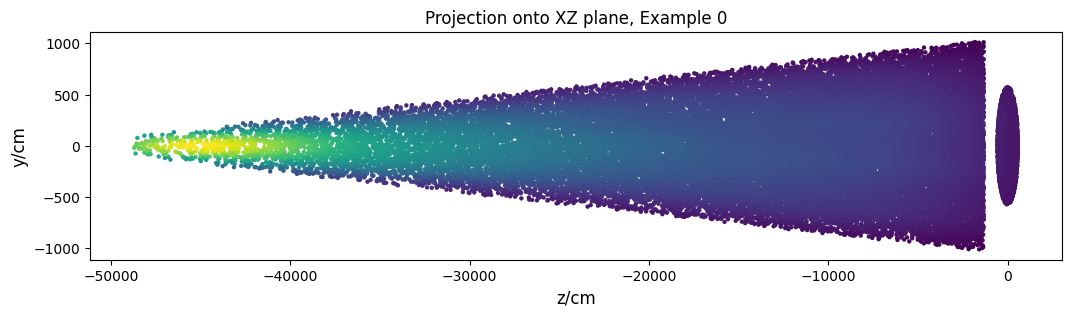

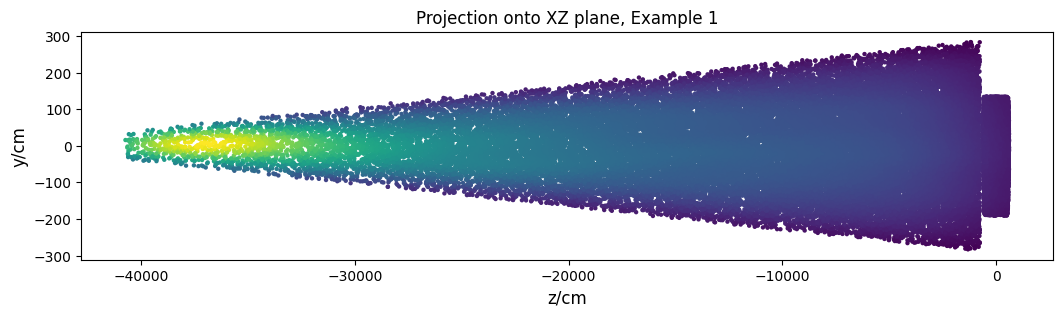

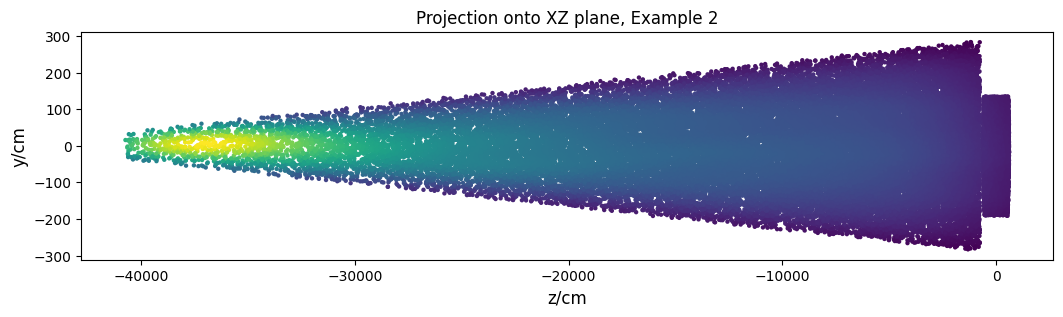

In [7]:
df_list = [df_mini, df_micro, df_micro_numi]

for i, df in enumerate(df_list):
    title = r"Projection onto XZ plane, Example " + str(i)
    xlabel = r'z/cm'
    ylabel = r'y/cm'
    
    axes_form  =[0.16,0.16,0.81,0.76]
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_axes(axes_form, rasterized=False)

    x = df['pos_scatt', '3']
    y = df['pos_scatt', '2']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy, weights=df['w_event_rate'])(xy)
    ax.scatter(x, y, c=z, s=10, edgecolor='None')

    ax.set_title(title,   fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

In [8]:
dn.geom.microboone_geometry(df_micro_numi)
